## How has the adoption of electric vehicles (EVs) changed over the years?

### Methodology
1. Group the data by Model Year
2. Count the number of vehicles for each year
3. Plot the trends over time


In [1]:
# Importing libraries and loading the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('../Original_data/Electric_Vehicle_Data.xlsx')


In [2]:
import os
print(os.getcwd())

c:\Users\abbas\Desktop\DA_files\Projects\Electric_cars\Project_EVs


In [3]:
# Grouping the data by Model Year and Electric Vehicle Type and then count the number of vehicles
yearly_trends = df.groupby(['Model Year', 'Electric Vehicle Type']).size().reset_index(name='Count').copy()

# Sorting by Model Year for better visualization
yearly_trends = yearly_trends.sort_values(by='Model Year', ascending=False)

# Removing the numbered index
yearly_trends = yearly_trends.set_index('Model Year')

# Removing the year 2024 since currently the data for this year is not complete
yearly_trends = yearly_trends.drop(2024)

yearly_trends

,Electric Vehicle Type,Count
Model Year,,
2023,Plug-in Hybrid Electric Vehicle (PHEV),7251
2023,Battery Electric Vehicle (BEV),51142
2022,Plug-in Hybrid Electric Vehicle (PHEV),4365
2022,Battery Electric Vehicle (BEV),23557
2021,Plug-in Hybrid Electric Vehicle (PHEV),3843
2021,Battery Electric Vehicle (BEV),15191
2020,Battery Electric Vehicle (BEV),10034
2020,Plug-in Hybrid Electric Vehicle (PHEV),1817
2019,Plug-in Hybrid Electric Vehicle (PHEV),2009


## Visualizing the Data

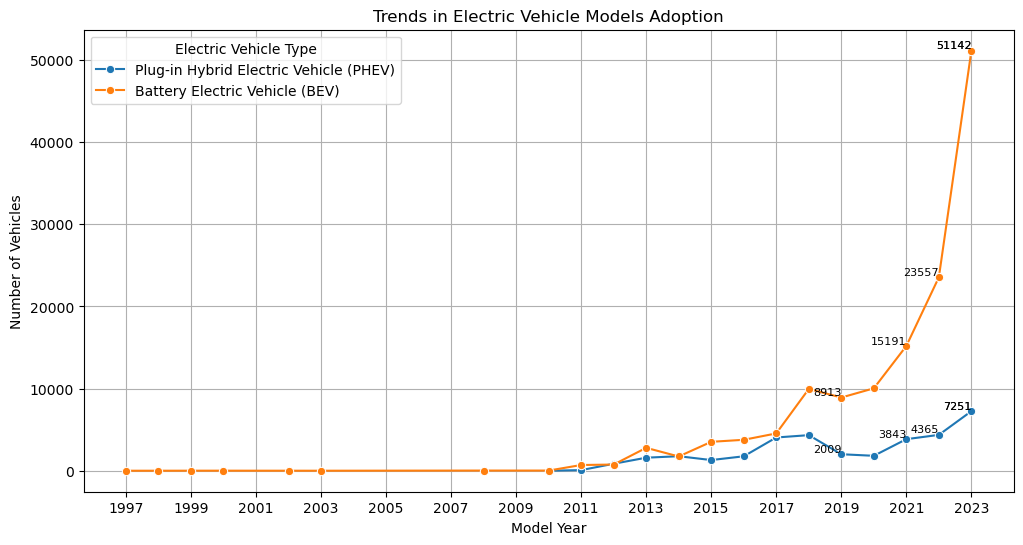

In [4]:
# Filter the data to start from 2015 onwards
filtered_trends = yearly_trends[yearly_trends.index >= 2015]

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Model Year', y='Count', hue='Electric Vehicle Type', marker='o')

# Customize x-axis to show every other year
plt.xticks(np.arange(yearly_trends.index.min(), yearly_trends.index.max() + 1, 2))

# Randomly select 5 data points for labeling from 2015 and onwards
np.random.seed(42)  # For reproducibility
random_points = np.random.choice(filtered_trends.index, 5, replace=False)

# Add labels to the data points (2015 onwards)
for point in random_points:
    for vehicle_type in filtered_trends['Electric Vehicle Type'].unique():
        value = filtered_trends.loc[(filtered_trends.index == point) & (filtered_trends['Electric Vehicle Type'] == vehicle_type), 'Count'].values
        if len(value) > 0:
            plt.text(point, value[0], f'{value[0]}', 
                     horizontalalignment='right', verticalalignment='bottom', fontsize=8)

# Adding labels and title
plt.title('Trends in Electric Vehicle Models Adoption')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()

## Filtering the Data to start from the year 2010

Due to few numbers of EVs before 2010, we will filter the chart to display data from 2010 onwards to get a better vizual visualization

In [5]:
# Filter out data from the year 2009 and earlier
yearly_trends = yearly_trends[yearly_trends.index > 2009]

# Display the filtered DataFrame to confirm the changes
yearly_trends

,Electric Vehicle Type,Count
Model Year,,
2023,Plug-in Hybrid Electric Vehicle (PHEV),7251
2023,Battery Electric Vehicle (BEV),51142
2022,Plug-in Hybrid Electric Vehicle (PHEV),4365
2022,Battery Electric Vehicle (BEV),23557
2021,Plug-in Hybrid Electric Vehicle (PHEV),3843
2021,Battery Electric Vehicle (BEV),15191
2020,Battery Electric Vehicle (BEV),10034
2020,Plug-in Hybrid Electric Vehicle (PHEV),1817
2019,Plug-in Hybrid Electric Vehicle (PHEV),2009


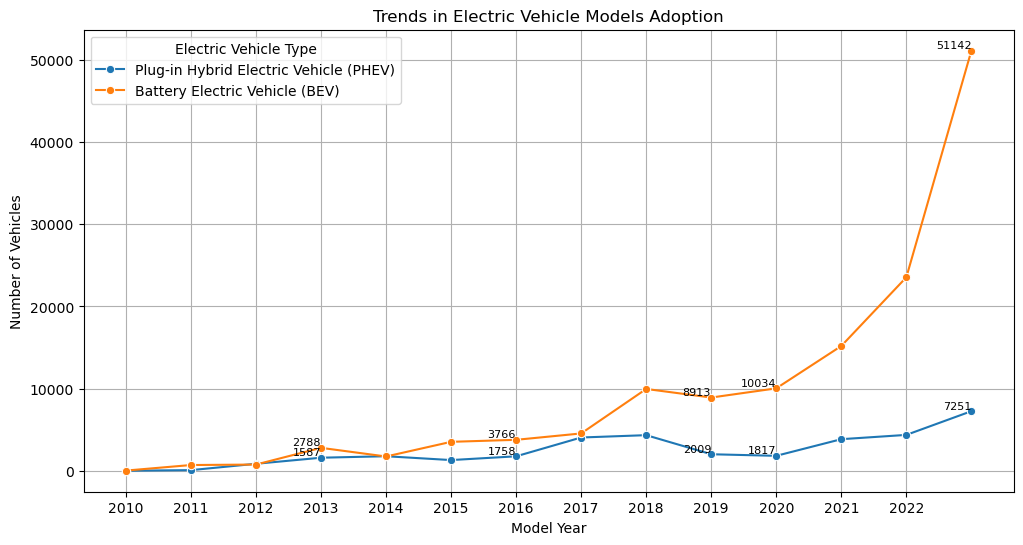

In [6]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='Model Year', y='Count', hue='Electric Vehicle Type', marker='o')

# Customize x-axis to show every year
plt.xticks(np.arange(yearly_trends.index.min(), yearly_trends.index.max()))

# Randomly select 5 data points
np.random.seed(12)  # For reproducibility
random_points = np.random.choice(yearly_trends.index, 5, replace=False)

# Add labels to the data points
for point in random_points:
    for vehicle_type in yearly_trends['Electric Vehicle Type'].unique():
        value = yearly_trends.loc[(yearly_trends.index == point) & (yearly_trends['Electric Vehicle Type'] == vehicle_type), 'Count'].values
        if len(value) > 0:
            plt.text(point, value[0], f'{value[0]}', 
                     horizontalalignment='right', verticalalignment='bottom', fontsize=8)

# Adding labels and title
plt.title('Trends in Electric Vehicle Models Adoption')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles')
plt.grid(True)
plt.show()